# KNN - EN YAKIN KOMŞULUK ALGORİTMASI

### İçindekiler


[1.MANTAR VERİ SETİ](#1)

> [1.1. Veri Setinde İncelenen Özellikler](#2)


[2. VERİ SETİNİN İNCELENMESİ](#3)


[3. K - EN YAKIN KOMŞULUK ALGORİTMASI (K NEAREST NEIGHBORS)](#4)


[4. PERFORMANS ÖLÇÜMÜ](#5)

> [4.1. Karışıklık Matrisi (Confusion Matrix) ](#6)

> [4.2. ROC Eğrisi (Receiver Operating Characteristics Curve)](#7)

[5. KAYNAKÇA](#8)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. GİRİŞ

Günümüzün popüler konularından biri haline gelen **Yapay Zeka** aslında insan zekasınden esinlenerek yapılan çalışmaların tümüne verilen isimdir.

<a id="1"></a> <br>
## 2.  MANTAR VERİ SETİ

Mantar veri seti, *Agaricus* ve *Lepiota* mantar ailesine ait 23 mantar türünün varsayımsal örneklerinin bir takım özelliklerini içerir. Veri seti içerisindeki incelenen mantarlar zehirli olup olmamalarına göre *kesinlikle yenilebilir, kesinlikle zehirli* veya *bilinmeyen yenilebilir* olarak tanımlanır. Bilinmeyen yenilebilir ile kesinlikle zehirli olanlar birleştirilip kesinlikle zehirli olarak kabul edilmiştir. Son tahlilde incelenen mantar veri seti içerisinde iki adet sınıf mevcuttur : *Kesinlikle Yenilebilir(Eligible)*, *Kesinlikle Zehirli(Poisonous)*. 

Mantarın hangi sınıfa dahil olduğunu apaçık belirten sadece birkaç özellik bulunmamaktadır. Bu nedenle mantar sınıfının doğru olarak tespiti için birçok gözlem sonucuna ihtiyaç vardır.

<a id="2"></a> <br>
### Veri Setinde İncelenen Özellikler

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s 

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 

**bruises?:** bruises=t,no=f 

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 

**gill-attachment:** attached=a,descending=d,free=f,notched=n 

**gill-spacing:** close=c,crowded=w,distant=d 

**gill-size:** broad=b,narrow=n 

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 

**stalk-shape:** enlarging=e,tapering=t 

**stalk-root:** bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s 

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s 

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 

**veil-type:** partial=p,universal=u 

**veil-color:** brown=n,orange=o,white=w,yellow=y 

**ring-number:** none=n,one=o,two=t 

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 

**population:** abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 

**habitat:** grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



> Projeye gerekli resimleri eklemek için Image modülünden yararlanılabilir.

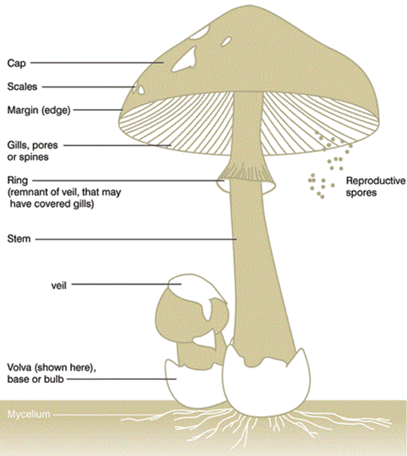

In [1]:
from IPython.display import Image # Image modulünü projeye dahil edilir.
Image("../input/knnimages/mantar.png") # Image fonksiyonuna resmin dosya yolu verilir.

<a id="3"></a> <br>
## 3. VERİ SETİNİN İNCELENMESİ

Veri seti üzerinde bir makine öğrenmesi algoritması çalıştırmadan önce içeriği hakkında bilgi almak için veriler incelenmelidir. Çünkü tanınan veriler hakkında daha kolay yorumlama yapılabilir.

Öncellikle veri setini projeye dahil etmek ve sonrasında incelemek için gerekli kütüphaneler projeye dahil edilir:

In [2]:
import numpy as np # Kullanılacak olan dizi, matris veya vektör gibi lineer cebir araçları için gerekli olacaktır.
import pandas as pd # Veriyi düzenlemek, veriyi yüklemek ve bir dataframe yapısında veriyi daha kolay incelemek için gerekli olacaktır.

**Veri seti projeye dahil edilir :**

> **read_csv(dosya_yolu)** fonksiyonu pandas kütüphanesinin bir fonksiyonu olup .csv formatında dosya okumak için kullanılır.

> *data* değişkeni DataFrame yapısındadır.

In [3]:
data=pd.read_csv("../input/mushroom-classification/mushrooms.csv")

**DataFrame yapısı kurulur :**

> **DataFrame** pandas kütüphanesi içerisinde bulunan veriyi bir tablo şeklinde tiple ifade eden ve verinin okunabilirliğini dolayısıyla yönetilebilirliğini arttıran bir veri tipidir.

> *data* olarak projeye dahil edilen veri seti artık "mframe" değişkenine atanmıştır ve DataFrame yapısındadır.


In [4]:
mframe=pd.DataFrame(data)

**Veri setinden incelenmek üzere örnek alınır :**

**head(sayi) :** DataFrame içerisinden ilk baştan *sayi* sayısı kadar satırı getirir. Eğer boş kullanılırsa 5 satır alınır.

**tail(sayi) :**  DataFrame içerisinden en sondan *sayi* sayısı kadar satırı getirir. Eğer boş kullanılırsa 5 satır alınır.

In [5]:
mframe.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [6]:
mframe.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


**Veri setinde bulunan kolonlar incelenir :**

> **DataFrame.columns :** DataFrame yapısı içerisinde bulunan kolonları getirir.

In [7]:
print(mframe.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


**Herhangi bir kolon özelinde veri seti incelenir : **

In [8]:
# Veri seti içerisinde yer alan "cap-shape","population","class" kolonlarının ilk 5 değeri getirilir.

print(mframe["cap-shape"].head()) 
print(mframe["population"].head())
print(mframe["class"].head()) 

0    x
1    x
2    b
3    x
4    x
Name: cap-shape, dtype: object
0    s
1    n
2    n
3    s
4    a
Name: population, dtype: object
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object


<a id="4"></a> <br>
## 4. K - EN YAKIN KOMŞULUK ALGORİTMASI (K NEAREST NEIGHBORS)

Veri seti incelendiğinde değerlerin kategorik veriler olduğu görülmektedir. Kategorik verilerde varsayım ve tahmin için Makine Öğrenmesi Algoritmaları'ndan **Gözetimli Öğrenme Algoritmaları** kullanılabilir çünkü algoritmadan veriler hakkında bilgi almadan önce algoritmaya etiketlenmiş, önceden kategorize edilmiş veriler tanıtılacaktır. Gözetimli Algoritmalar içerisinde yer alan **Sınıflandırma Algoritmaları** kategorize edilmiş veriler üzerinde çalışan çözümlerdir. Örnek olarak kullanılan mantar veri seti için **Sınıflandırma Algoritmaları**'ndan herhangi biri kullanılabilir. Veri içerisinde neredeyse her kolonda bir sınıflandırma vardır fakat bazı kolonların sınıflandırılması bazı kolonlara bakılarak daha kolay tahmin edilebilir. Veri seti içerisinde bulunan *class* kolonu mantarın zehirli olup olmadığını kategorize etmiştir. Diğer kolonlara bakılarak bu kolonda yer alan kategori tahmin edilebilir. **K - En Yakın Komşuluk Algoritması** Gözetimli Öğrenme biçimlerinden Sınıflandırma ve Regresyon içerisinde kullanılabilen daha çok sınıflandırma içerisinde çalıştırılan bir algoritmadır.


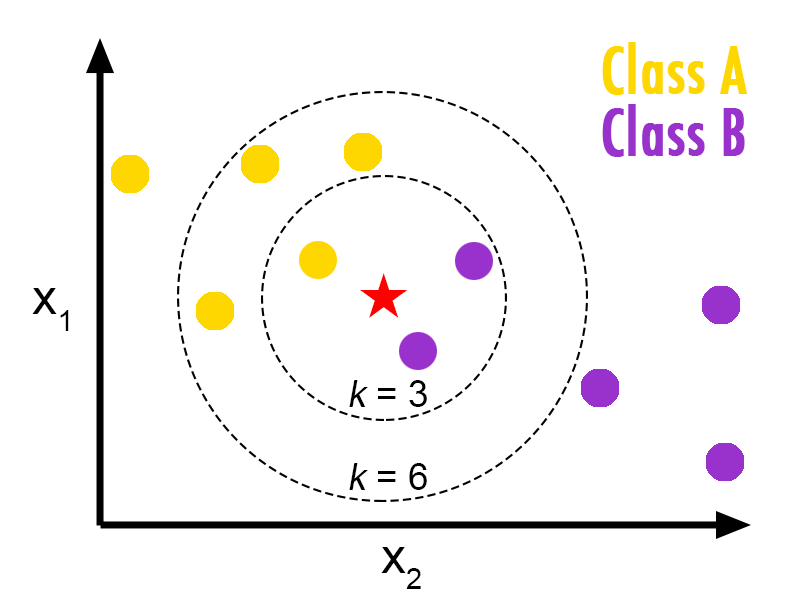

In [9]:
Image("../input/knnimages/knn.png")

Sınıfı belli olmayan verinin k sayısı kadar komşuluğuna bakılır. k=3 için sınıfsız verinin çevresinde 3 adet sınıflı veriye bakılır, bu verilerim sınıfları kontrol edilir. Hangi sınıfın verisi fazla ise sınıfsız veri o sınıfa dahil edilir. Örneğin k=3 komşuluğunda 2 adet A sınıfından eleman var ise 2>1 olduğuundan sınıfsız verinin sınıfı A olarak atanır. Böyle bir yöntemle sınıf belirlenmesinde **oy çokluğu** kullanılır, komşuluk içerisinde elemanı çok olan sınıf oylamayı kazanır ve sınıfsız eleman oylamayı kazanan sınıfa dahil edilir.

K - En Yakın Komşuluk algoritmasının kullanımında **Girdi(X)** ve **Çıktı(y)** değerleri ile **Eğitim** ve **Test** veri setleri belirlenir. Eğitim verilerindeki Girdi ve Çıktı değerlerinden yararlanan algoritmanın modeli verinin kuralını belirler. Kural belirlemeden kasıt *hangi Girdi değerleri için veri seti içerisinde hangi Çıktı değerlerinin olduğunu algoritmanın " öğrenmesidir "*. Daha sonra da Test veri setinde bulunan Girdi verileri kullanılarak yine Test veri setinde bulunan Çıktı değerleri tahmin edilir.

Yeni verinin sınıfını belirlerken daha önce sınıflandırılmış verilere olan k komşuluğuna bakılırken sınıfsız veri ile sınıflandırılmış veriler arasındaki uzaklık değerine bakılır. K - En Yakın Komşuluk algoritması için genelde üç ayrı uzaklık fonksiyonu kullanılır. 


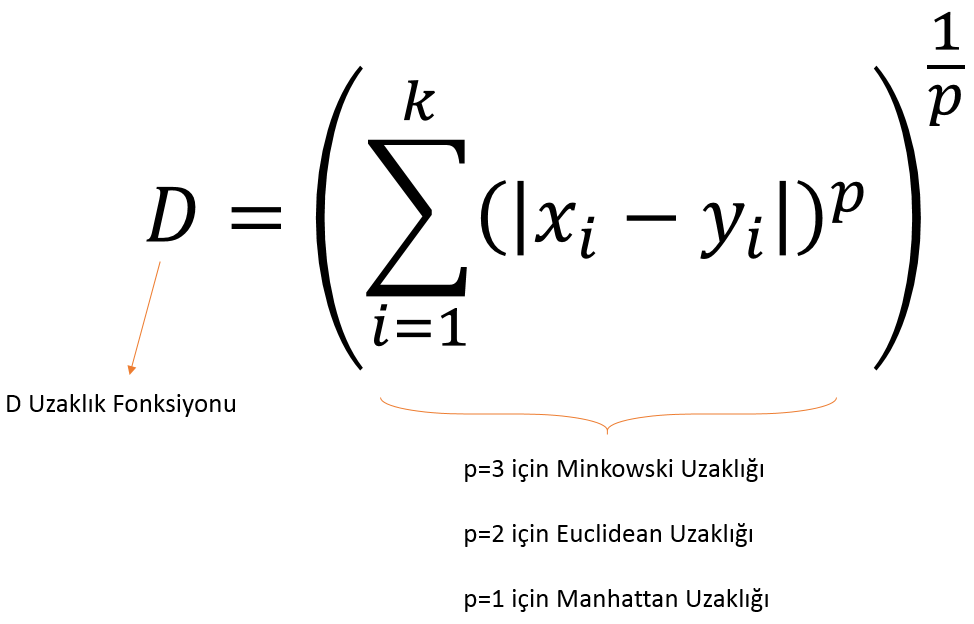

In [10]:
Image("../input/knnimages/uzaklikfonk.png")

**Veri Setinin Uygulanacak Algoritma için Hazırlanması : **

 Model oluşturmak için Girdi(X) ve Çıktı(y) değerleri belirlenir.
 Girdi değerleri bir algoritmik modelde kullanılacak ve çıktı değerleri tahmin edilecektir.

In [11]:
X=mframe.iloc[:,1:] # "class" kolonu dışındaki tüm kolonlar girdi değeri olarak tanımlandı. Ne kadar çok birbiriyle alakalı girdi kolonu kullanılırsa çıktının tahmini o kadar yüksek doğrulukta çıkacaktır.

y=mframe.iloc[:,0]  # "class" kolonu çıktı değeri olarak tanımlandı. Çünkü class kolonu içerisindeki kategori tahmin edilecek.

LabelEncoder kategorize edilmiş verilerde her bir kategoriye sıfırdan başlayarak sayı verir. Bu veri seti için zehirli mantar sınıfına(p: poisonous) 1 değerini atarken zehirsiz mantar sınıfına(e: eligible) 0 değerini atamıştır. Tüm sütunlar içerisinde bulunan kategorik veriler göre sayısal değerler kullanılarak yeniden tanımlanmıştır.

> **LabelEncoder** kategorize edilmiş verileri etiketlemek için kullanılır.

In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d=defaultdict(LabelEncoder)

XFit=X.apply(lambda x: d[x.name].fit_transform(x))

LEncoder=LabelEncoder()

yFit=LEncoder.fit_transform(y)

Veri seti içerisinde bulunan kategorilerin (her bir kategori için ayrı) sayısal değerlerle ifade edilmesi verileri sınıflandırmak açısından iyidir. Fakat girdi değerlerinin sayısal ifadelerden oluşuyor olması modeli eğitmek açısından yanlış sonuçlar doğurabilir. Çünkü sayısal değerler her ne kadar sınıflandırma amacıyla yapılıyor olsa da sayısal değerler karşılaştırıldığında bir sonuç ortaya çıkmaktadır. Örneğin Elma ile Armut sınıfı karşılaştırıldığında iki ayrı gruplandırma olduğundan herhangi bir aritmetik değer çıkmaz fakat 1 ile 2 karşılaştırıldığında sonuç 1 küçük ya da 2 büyük şekilde olabilir. Sayısal kategorize edilen verileri kullanmak için sonuçların model tarafından çarpıtılmasını **One Hot Encoding** yönetimi engelleyebilir. Örneğin bir kolonda **1, 2, 3** ile ifade edilen kategoriler olsun. Bu kolona One Hot Encoding yöntemi uyguladığında **[1 0 0], [0 1 0], [0 0 1]** şeklinde üç kolon tanımlanır. **[1 0 0]** kolonu 1 değerini, **[0 1 0]** kolonu 2 değerini, **[0 0 1]** kolonu da 3 değerini temsil etmektedir.

In [13]:
import warnings # Uyarıların yönetimi için kullanılan kütüphanedir.

warnings.filterwarnings("ignore") # Çıkacak uyarıların gözardı edilmesi için kullanılır.

from sklearn.preprocessing import OneHotEncoder
ohc=defaultdict(OneHotEncoder)

resultFrame=pd.DataFrame()

kolonSayisi=mframe.shape[1]

for i in range(kolonSayisi-1):
    
    Xtemp_i=pd.DataFrame(ohc[XFit.columns[i]].fit_transform(XFit.iloc[:,i:i+1]).toarray())
    
    ohc_obj=ohc[XFit.columns[i]]
    LEncoder_i=d[XFit.columns[i]]
    Xtemp_i.columns=XFit.columns[i]+ "_" + LEncoder_i.inverse_transform(ohc_obj.active_features_)
    
    
    X_ohc_i=Xtemp_i.iloc[:,1:]
    
    resultFrame=pd.concat([resultFrame,X_ohc_i],axis=1)

In [14]:
print(mframe.shape,"->",resultFrame.shape) # Yeni veri setinin boyutu

# Bir kolonda yer alan kategoriler için ayrı ayrı kolonlar oluşturulmuş dolayısıyla veri setinin boyutu artmıştır.

(8124, 23) -> (8124, 95)


In [15]:
resultFrame.head(10) # Hazırlanan yeni veri setinden örnek alınması.

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0

**Eğitim ve Test Verilerinin Ayarlanması :**

In [16]:
from sklearn.model_selection import train_test_split # Eğitim ve Test verilerini ayırmak için kullanılan fonksiyondur.

X_train, X_test, y_train, y_test=train_test_split(resultFrame,yFit,test_size=0.3) # Test Verisi %30 Eğitim Verisi %70 olarak atandı.

**K - En Yakın Komşuluk Algoritmasının Uygulanması : **

In [17]:
from sklearn.neighbors import KNeighborsClassifier # KNN Algoritmasının modülü projeye dahil edildi.

KModel=KNeighborsClassifier(n_neighbors=30,metric="minkowski") # KNN Modeli kuruldu ve k komşuluk sayısı 30 olarak alındı. Yani sınıflandırılacak olan verinin 30 eleman komşuluğuna bakara karar verir. 
# Eğer herhangi bir uzaklık metriği verilmez ise algoritma "minkowski" uzaklığına göre uzaklık hesaplayacaktır. Burada da minkowski uzaklık metriği kullanılmıştır.

KModel.fit(X_train,y_train) # KNN algoritması ayarlanan Eğitim verileri üzerinde uygulandı ve model "Eğitildi"

y_pred=KModel.predict(X_test) # Uygulanan model için Test verileri tahmin edildi.

<a id="5"></a> <br>
## 5. PERFORMANS ÖLÇÜMÜ

#### K - En Yakın Komşuluk algoritmasının eğitim verisi olarak kullanacağı verinin eleman sayısı:

In [18]:
print(len(X_train))

5686


<a id="6"></a> <br>
### 5.1. Karışıklık Matrisi (Confusion Matrix) 

Gerçek değerleri bilinen, sınıflandırma algoritmalarının performanslarını ölçmek için kullanılan değerleri içeren matrise "Karışıklık Matrisi (Confusion Matrix)" denir. Karışıklık matrisi sınıflandırmada oluşturulan modelin neyi ne kadar doğru sınıflandırdığını ölçmek için kullanılmaktadır. İkili bir sınıflandırma örneğinde 2X2 boyutunda bir karışıklık matrisi hesaplanabilir.

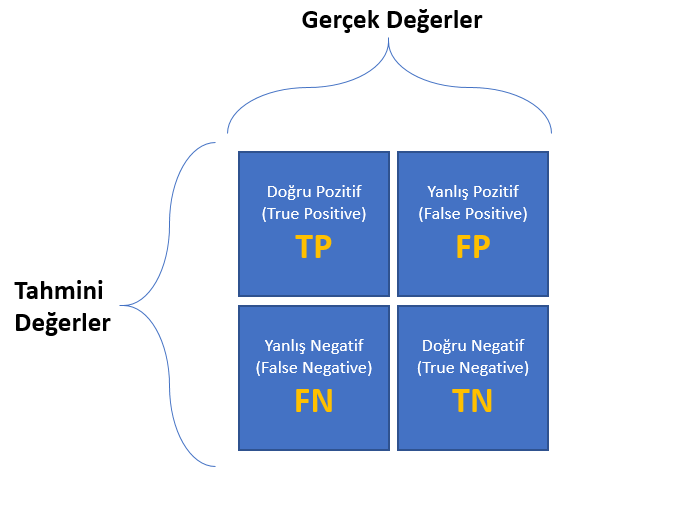

In [19]:
Image("../input/knnimages/karisiklikmatrisi.png")

>**Doğru Pozitif - True Positive - TP :** Gerçekte olan değerin 1 ile tahmin edilen değerin 1 olduğu örneklerin sayısıdır.

>**Yanlış Pozitif - False Positive - FP :** Gerçekte olan değerin 1 ile tahmin edilen değerin 0 olduğu örneklerin sayısıdır.

>**Yanlış Negatif - False Negative - FN :** Gerçekte olan değerin 0 ile tahmin edilen değerin 0 olduğu örneklerin sayısıdır.

>**Doğru Negatif - True Negative  - TN :** Gerçekte olan değerin 0 ile tahmin edilen değerin 1 olduğu örneklerin sayısıdır.

>**Doğruluk Oranı - Accuracy Rate :** Sınıflayıcı olarak kullanılan algoritmanın ne kadar doğrulukta sınıflandırdığının ölçüsüdür. 0 ile 1 arasında çıkan bir değerdir. Oran 1' e yaklaştıkça sınıflandırmanın doğruluğu artar.

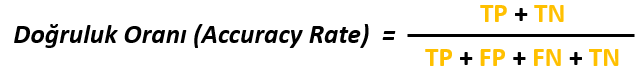

In [20]:
Image("../input/knnimages/dogrulukOrani.png")


**Karışıklık Matrisini Oluşturma : **

In [21]:
from sklearn.metrics import confusion_matrix # Karışıklık matris fonksiyonunun dahil olduğu paket dahil edilir.

Karisiklik_Matrisi=confusion_matrix(y_test,y_pred) # Karışıklık matrisinin girdi değerleri yazılarak matris hesaplanır.

print(Karisiklik_Matrisi)

[[1268    0]
 [   1 1169]]


**Doğruluk Oranını Hesaplama : **

In [22]:
from sklearn.metrics import accuracy_score

dogruluk_Orani=accuracy_score(y_test,y_pred) # Yapılan sınıflandırma işleminin ne oranda doğru olduğunu döndürür. 0 ile 1 arasında değer alır.

print(dogruluk_Orani) 

0.9995898277276456


<a id="7"></a> <br>
### 5.2. ROC Eğrisi (Receiver Operating Characteristics Curve)

ROC eğrisi çok sınıf içeren sınıflandırma problemlerinin performanslarını kontrol etmek için kullanılan eğridir.
**AUC (Area Under The Curve)** kavramı burada önemlidir ve ROC Eğrisinin altında kalan alanın ölçüsünü temsil etmektedir. ROC Eğrisi bir olasılık eğrisi olduğu için mükemmel bir modelde eğrinin altında kalan alan bire eşittir. Yani sıfıra yaklaştıkça modelin performansı, sınıfları ayırabilirliği, düşecektir. Eğer AUC değeri 0.5 gibi bir değer ise ölçülen model neredeyse hiç sınıf ayıramıyor demektir. ROC eğrisinin altındaki alan (Area Under Curve (AUC)), bir parametrenin iki sınıf arasında ne kadar iyi ayırt edilebileceğinin bir ölçüsüdür.

ROC eğrisi iki boyut içeren bir eğridir. Boyutlarından <u>y eksenine</u> **TPR** değeri, <u>x eksenine</u> **FPR** değeri atanır.

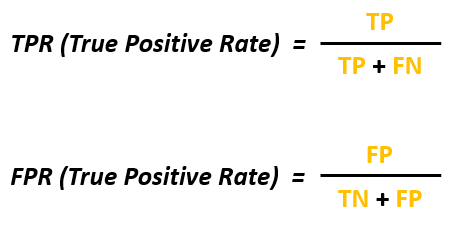

In [23]:
Image("../input/knnimages/tprfpr.png")

#### ROC Eğrisi Değerleri Hesaplanır : 

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score # ROC Eğrisi için gerekli değerlerin hesaplanmasında kullanılan modüllerdir.
import matplotlib.pyplot as plt # ROC Eğrisini çizmek için gerekli çizim modülüdür.


false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred) # roc_curve() fonksiyonu aldığı y_test ve y_pred değerlerini kullanarak FPR, TPR ve Threshold(Eşik Değeri) ifadelerini döndürür

print('KNN Algoritması için AUC Değeri : ', roc_auc_score(y_test, y_pred))

KNN Algoritması için AUC Değeri :  0.9995726495726496


#### ROC Eğrisi Çizilir : 

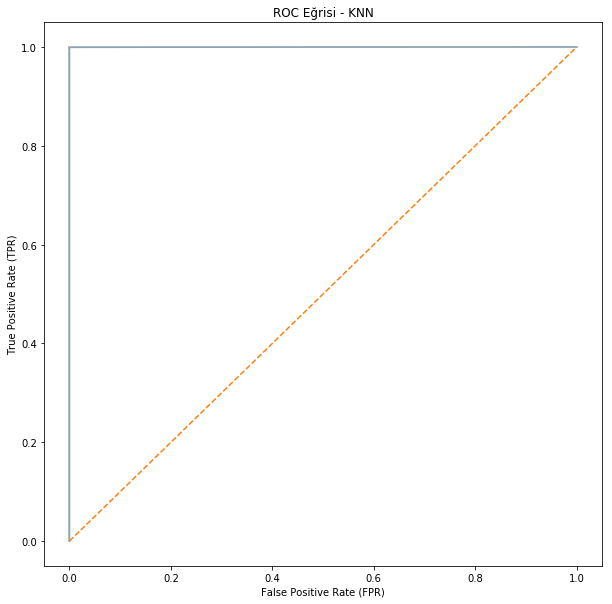

In [25]:
plt.subplots(figsize=(10,10))    
plt.title('ROC Eğrisi - KNN')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

### 5.3. Değişen K Komşuluk Değerleri için K - En Yakın Komşuluk Algoritmasının Performansı

K - En Yakın Komşuluk(KNN) algoritmasında hiç şüphesiz en önemli değişken **k-komşuluk sayısı**dır. Komşuluk sayısı algoritmanın çalıştığı veri seti üzerinde ne şekilde uzaklık hesaplayacağını belirttiği için veri setinin özelliğine bağlı olarak da değişir. Eğer sadece 100 elemanlı bir veri setinde bu algoritma çalıştırılırsa mutlaka k-komşuluk sayısı 100'den küçük olmalıdır ki anlamlı sonuçlar çıksın. Çünkü 100 elemanlı bir veri setinde herhangi bir elemanın 100 eleman komşuluğuna bakıldığında veri setinin neredeyse tüm elemanlarıyla çalışılacağı için algoritmanın eğitim ve test verilerine gerek kalmayacaktır, algoritma tüm verileri görecektir. Böylece algoritma hem veriyi **ezberleyecek** hem de veri setine yeni bir veri eklendiğinde o verinin sınıfını bulmakta **duyarsızlaşacak**tır.

In [75]:
# Değişen k-komşuluk sayılarına göre algoritmanın doğruluk oranına bakılır:

def KNNHesapla(komsuluk,uzaklik,X_train,X_test,y_train,y_test):
    """
    Fonksiyon değişen komşuluk ve uzaklık parametrelerine göre KNN algoritmasının doğruluk oran listesini döndürür.
    
    komsuluk: KNN algoritmasında kullanılan k-komşuluk sayısının parametresidir.
    uzaklık: KNN algoritmasında kullanılan uzaklık tipinin parametresidir. minkowski - euclidean - manhattan olmak üzere üç türdür.
    X_train: Girdi değerlerinden eğitim verisi olarak kullanılan listedir.
    y_train: Çıktı değerlerinden eğitim verisi olarak kullanılan listedir.
    X_test: Girdi değerlerinden test verisi olarak kullanılan listedir.
    y_test: Çıktı değerlerinden test verisi olarak kullanılan listedir. Tahmin edilecek olan listedir.
    
    """
    oranListesi=[]
    
    for i in range(1,komsuluk):
        
        knnModel=KNeighborsClassifier(n_neighbors=i,metric=uzaklik) 
        
        knnModel.fit(X_train,y_train)
        
        y_pred=knnModel.predict(X_test)
        
        dogrulukOrani=accuracy_score(y_test,y_pred)
        
        oranListesi.append(dogrulukOrani)
        
    return oranListesi

In [76]:
# KNNHesapla fonksiyonu kullanılarak değişen uzaklık hesaplama yöntemlerine göre algoritmanın doğruluk oranları hesaplanır:

oranListe_Min=KNNHesapla(100,"minkowski",X_train,X_test,y_train,y_test) # Minkowski uzaklığı için 1-100 komşuluğunda algoritma doğruluk oranının listesi hesaplandı.

oranListe_Euc=KNNHesapla(100,"euclidean",X_train,X_test,y_train,y_test) # Euclidean uzaklığı için 1-100 komşuluğunda algoritma doğruluk oranının listesi hesaplandı.

oranListe_Man=KNNHesapla(100,"manhattan",X_train,X_test,y_train,y_test) # Manhattan uzaklığı için 1-100 komşuluğunda algoritma doğruluk oranının listesi hesaplandı.


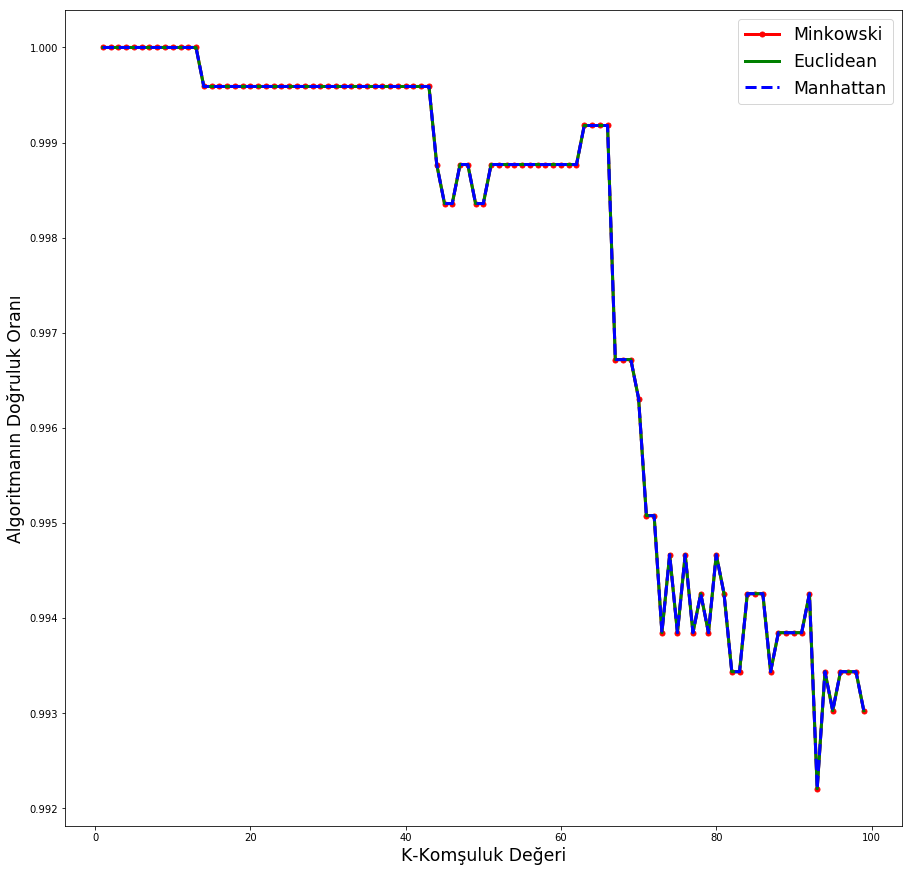

In [77]:
plt.subplots(figsize=(15,15)) # Grafik çizimi için 15x15 boyutunda şablon oluşturulur.

x=range(1,100) # Grafikte kullanılacak olan X-Ekseni k-komşuluk sayısını temsil edeceğinden x-ekseni 1-100 arasında bir sayı dizisi olarak tanımlanır.

# X eksenleri sabit olacak şekilde daha öncesinden Minkowski, Euclidean ve Manhattan uzaklıkları kullanılarak hesaplanan doğruluk oranlarına göre farklı çizgiler aynı grafiğe eklenir:

plt.plot(x,oranListe_Min,color="r",linewidth=3.0,label="Minkowski",marker="o",markersize=5) 
plt.plot(x,oranListe_Euc,color="g",linewidth=3.0,label="Euclidean")
plt.plot(x,oranListe_Man,color="b",linewidth=3.0,label="Manhattan",linestyle="--")

# Grafiğin X ve Y ekseninde görünecek isimler ile bilgilendirme panosu eklenir: 

plt.xlabel("K-Komşuluk Değeri",fontsize="xx-large")
plt.ylabel("Algoritmanın Doğruluk Oranı",fontsize="xx-large")
plt.legend(fontsize="xx-large")

plt.show() # Grafikle birlikte bilgilendirme satırının çıkmamasını sağlar. Sadece grafiğin görseli çıktı olarak görünür.


Minkowski, Euclidean ve Manhattan uzaklıkları bu veri seti için 1-100 komşuluğunda aynı değerleri vermektedir.En uygun k komşuluk sayısı 1-60 arasında seçilmelidir. Komşuluk sayısı yaklaşık olarak 60 dan fazla alındığında algoritmanın doğru sınıflandırma oranında ciddi düşüş görülmektedir.

<a id="8"></a> <br>
## 6. KAYNAKÇA

> 1. https://archive.ics.uci.edu/ml/datasets/mushroom 

> 2. https://medium.com/@k.ulgen90/makine-%C3%B6%C4%9Frenimi-b%C3%B6l%C3%BCm-2-6d6d120a18e1

> 3. https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d

> 4. https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

> 5. https://setscholars.net/2019/02/03/how-to-plot-roc-curve-in-python/

> 6. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

> 7. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

> 8. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
